# MNIST Classification
In this exercise we will explore the performance of several classification techniques on classifying handwritten digits. The canonical dataset used is the MNIST dataset (https://en.wikipedia.org/wiki/MNIST_database). We will evaluate classifier performance through train/validation/test sets provided to you. 

This exercise will use TensorFlow (https://en.wikipedia.org/wiki/TensorFlow). <b>Ignore all warnings produced by the tensorflow library (or others that you are required to use in this project, e.g. scikit-learn).</b>

In [1]:
# imports
from utils import get_data_extract
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import time
from sklearn.metrics import accuracy_score

# For reproducibility
tf.random.set_seed(0)
np.random.seed(0)


Run the following line to retrieve the data and generate the training, validation, and test sets using the function <b>get_data_extract()</b> provided in <b>utils.py</b>. <br>
<b>We want you to use the training, validation and test sets provided by this function, exclusively.</b>

In [2]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = get_data_extract()
print('hello')

hello


# 0. Understanding the data

The resolution of the images are all $28\times 28$. The corresponding feature vector of an image is a $28^2=784$ length 1D array representing the row-major flattened version of the image (i.e. the rows are concatenated top-down). All values in the array are in the range $[0,1]$ representing the grayscale value at that point. Note to get the pixel value, you would have to multiply these values by $255$.  

a) What are the dimensions of $X_{train}, X_{val}, X_{test}$?

In [8]:
# (1 pt) Calculate dimensions here
train_samples, train_features = X_train.shape
val_samples, val_features = X_val.shape
test_samples, test_features = X_test.shape

print("X_train dimensions:", train_samples, "samples by", train_features, "features")

print("X_val dimensions:", val_samples, "samples by", val_features, "features")

print(" X_test dimensions:", test_samples, "samples by", test_features, "features")


X_train dimensions: 16500 samples by 784 features
X_val dimensions: 1500 samples by 784 features
 X_test dimensions: 3000 samples by 784 features


b) Display the first two images of $X_{train}$. (You may find the <b>np.reshape()</b> and <b>plt.imshow()</b> methods useful.)

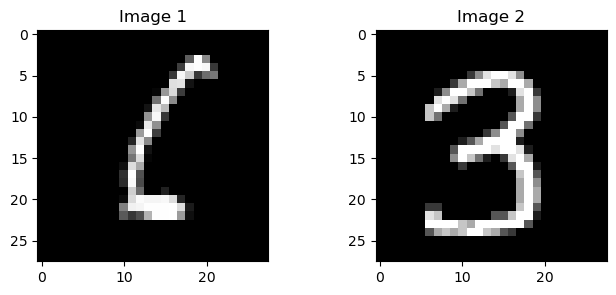

In [4]:
# (1 pt) Display first two training images here
plt.figure(figsize=(8, 3))

for i in range(2):
    image = np.reshape(X_train[i], (28, 28)) 
    plt.subplot(1, 2, i+ 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image {}'.format(i + 1))

plt.show()

c) Print out the first two labels in $Y_{train}$. 

In [9]:
# (1 pt) Print first two training labels here

print("First Y_train label:", Y_train[0])

print("Second Y_train label:", Y_train[1])

First Y_train label: 6
Second Y_train label: 3


We will now use the MNIST data extracts above to compare various classification algorithms. <b>ONLY use the data extracts provided above. </b> We are primarily interested in two metrics: 
1. the test set accuracy (0.0 being all incorrect and 1.0 being all correct)
2. time it takes to train the model and produce classifications for the <b>test set</b> <br>

$X_{train}, Y_{train}$ will be used for training while $X_{test}, Y_{test}$ will be used for evaluating performance. Some models will use $X_{val}, Y_{val}$ for parameter tuning. 

# 1. Logistic Regression

Repeat the exercise above for sklearn's <b>LogisticsRegression()</b> algorithm. You might find the following arguments helpful when initializing the model: <b>penalty='l1', C=1.0, tol=0.01, solver='liblinear'</b>. These parameters will help speed up the algorithm significantly. Produce the training time, test set prediction accuracy score and time taken to produce predictions. Format your answers.

In [10]:
from sklearn.linear_model import LogisticRegression

# (5 pts) Train Logistic Regression and report time
start = time.time() 
logistic = LogisticRegression(penalty='l1', C=1.0, tol=0.01, solver='liblinear')
logistic.fit(X_train, Y_train)
end = time.time()  
train_time = end-start

# (5 pts) Test Logistic Regression and report accuracy, time
start = time.time()  
test_predictions = logistic.predict(X_test)
end = time.time()  
test_time = end -start 


print("Training time: {:.4f} seconds".format(train_time))

print("test prediction time: {:.4f} seconds".format(test_time))

accuracy = accuracy_score(Y_test, test_predictions) 
print("Test  accuracy: {:.4f}".format(accuracy))



Training time: 1.2610 seconds
test prediction time: 0.0050 seconds
Test  accuracy: 0.9133


<b>****** The folowing models take a long time to run so we suggest reading all parts of the exercise first before implementing code. *****</b>

# 2. Logistic Regression with Polynomial Features

We now add polynomial features to our logistic regression. For that purpose, extend $X_{train}$ with second moment information. Specifically, add the squared value of each pixel, and the empirical covariance matrix, where each column in each 28x28 image is treated as different measurements of the corresponding row (hint: you can look on each row of X_train as a 28x28 image and then use np.cov). Now, re-run the logistic regression procedure from the previous excercise. You might find the following arguments helpful when initializing the model: <b>penalty='l1', C=8.0, tol=0.01, solver='liblinear'</b>. These parameters will help speed up the algorithm significantly, and yield good performance. Produce the training time, test set prediction accuracy score and time taken to produce predictions. Format your answers.

In [16]:
# (5 pts) Train Logistic Regression and report time
# (5 pts) Test Logistic Regression and report accuracy, time
from sklearn.preprocessing import PolynomialFeatures

#second moment for train
X_train_squared = X_train ** 2
# match dimension
X_train_squared_reshaped = X_train_squared.reshape(-1, 28, 28)
# Covariance matrix for images
covariance_train = np.array([np.cov(image) for image in X_train_squared_reshaped])
# flatten matrix for X_train
X_train_extend = np.hstack((X_train, X_train_squared, covariance_train.reshape(len(covariance_train), -1)))

#similar extension for x_test
X_test_squared = X_test ** 2
X_test_squared_reshaped = X_test_squared.reshape(-1, 28, 28)
covariance_test = np.array([np.cov(image) for image in X_test_squared_reshaped])
X_test_extend = np.hstack((X_test, X_test_squared, covariance_test.reshape(len(covariance_test), -1)))

# train extended features  logistic model
start = time.time() 
logistic_extended = LogisticRegression(penalty='l1', C=8.0, tol=0.01, solver='liblinear')
logistic_extended.fit(X_train_extend, Y_train)
end = time.time()  

train_time = end -start 

# test model
start = time.time() 
test_predictions = logistic_extended.predict(X_test_extend)
end = time.time() 

test_time_extended = end - start 
accuracy = accuracy_score(Y_test, test_predictions)  

print("training time: {:.4f} seconds".format(train_time))
print("test time: {:.4f} seconds".format(test_time))
print("test accuracy: {:.4f}".format(accuracy))

print("""\nPolynomial regression improves the test accuracy from 0.91 to 0.93. We use larger regularization coefficient of C= 8.0 
to handle the higher dimensionality.By taking second moments were handle a larger feature space. Without the regularization the 
model likely will overfit the training set.""")
     


training time: 7.2456 seconds
test time: 0.0050 seconds
test accuracy: 0.9330

Polynomial regression improves the test accuracy from 0.91 to 0.93. We use larger regularization coefficient of C= 8.0 
to handle the higher dimensionality.By taking second moments were handle a larger feature space. Without the regularization the 
model likely will overfit the training set.


Q (4 pts): Does polynomial features improve the performance of the logistic regression model? Why does it necessary to use larger regularization coefficient in this case?  

# 3. k-Nearest Neighbors

a) Repeat the classification exercises above for sklearn's kNN algorithm <b>KNeighborsClassifier()</b> using <b>k=1</b>. You might find the following arguments helpful when initializing the model: <b>algorithm='kd_tree', metric='minkowski', p=2</b>. These parameters will help speed up the algorithm significantly. However, the predictions will still be very slow. Produce the training time, test set prediction accuracy score and time taken to produce predictions. Format your answers.

In [17]:
# (4 pts) Train kNN for k=1 and report time
# (4 pts) Test kNN and report accuracy, time
from sklearn.neighbors import KNeighborsClassifier

#training kNN for k=1
start = time.time() 
knn_model = KNeighborsClassifier(n_neighbors=1, algorithm='kd_tree', metric='minkowski', p=2)
knn_model.fit(X_train, Y_train)
end = time.time()  

train_time =end - start 

# test the kNN
start = time.time() 
test_predictions = knn_model.predict(X_test)
end = time.time()  

test_time= end- start


print("training time: {:.4f} seconds".format(train_time))
print("test time: {:.4f} seconds".format(test_time))

accuracy = accuracy_score(Y_test, test_predictions)
print("test accuracy: {:.4f}".format(accuracy))



training time: 1.3996 seconds
test time: 53.4674 seconds
test accuracy: 0.9547


b) For the kNN model trained above, what is the prediction accuracy on the <b>training set</b> $X_{train}, Y_{train}$ (this will take a while to compute)? Compare this to the the prediction accuracy on the training set for the <b>LogisticRegression model</b> (without polynomial features)? 

In [19]:
# (2 pts) Report kNN training accuracy
train_knn = knn_model.predict(X_train)
knn_train_accuracy = accuracy_score(Y_train, train_knn)

# (2 pts) Report Logistic Regression training accuracy 
train_logistic = logistic.predict(X_train)
logistic_train_accuracy = accuracy_score(Y_train, train_logistic)

print("kNN training accuracy: {:.4f}".format(knn_train_accuracy))
print("logistic Regression training accuracy: {:.4f}".format(logistic_train_accuracy))

kNN training accuracy: 1.0000
logistic Regression training accuracy: 0.9297


c) (3 pts) Does anything surprise you about the Training set accuracies above? Why or why not?

It makes sense that kNN overfits the given set since that's what it's designed to bound given the comparison of distances for the data. logistic regression does not have that capability to classify perfectly if data is not perfectly linearly separable 

d) (3 pts) Can you think why there is such a large difference between the kNN algorithms's training and prediction times?

Prediction takes longer since it needs to determine the near distance from new samples and from those in training set. So this repetitous computation may take a long time for larger and larger sets, since it iteratively compares to the training set.

e) For now, we have only tried <b>k=1</b> (choose the closet neighbor) according to the Euclidean distance metric <b>p=2</b>. Repeat the exercise above for the following combinations of parameters: <b> k $\in$ {1, 3}, p $\in$ {2, 3} </b>. Note that p=2 is the 2-norm (Euclidean distance) and p=3 is the 3-norm. Train each of the models on the training set and evaluate the accuracy on the <b>validation set</b> $X_{val}, Y_{val}$. <b>NOTE: this might take a while!</b> Report the validation set accuracy for each model. Format your answers.

<b>Note:</b> We recommend following the code skeleton below.

In [21]:
# Train kNN for all combinations of parameters above and report validation accuracy for each
def runKNN(X_train,Y_train, X_val, Y_val, k, p):
    """k nearest neighbors running for p norm distance.
       Returns knn model, knn_score for X_val and Y_val, and training time"""
    
    # (6pts) your code below
    start_t = time.time()
    knn = KNeighborsClassifier(n_neighbors =k, algorithm='kd_tree', metric='minkowski', p= p)
    knn.fit(X_train, Y_train)
    end_t = time.time()
    
    train_time = end_t  -start_t

    val_score = knn.score(X_val, Y_val)
    return (knn, val_score, train_time)

best_score = 0.0
best_k, best_p, best_knn = None, None, None
best_train_time = np.inf

for k in [1, 3]:
    for p in [2, 3]:
        (knn_model, val_score, train_time) = runKNN(X_train,Y_train, X_val, Y_val, k, p)
        
        if val_score > best_score:
            best_score, best_k, best_p, best_knn, best_train_time = val_score, k, p, knn_model, train_time
       
        # (each (k,p) combination 1 pt) your code here
        print("validation accuracy for k={}, p={}: {:.4f}".format(k, p, val_score))


print("\nbest parameters are k={}, p={}".format(best_k, best_p)) 
print("\nbest_train_time={:.4f} seconds".format(best_train_time))

validation accuracy for k=1, p=2: 0.9607
validation accuracy for k=1, p=3: 0.9633
validation accuracy for k=3, p=2: 0.9733
validation accuracy for k=3, p=3: 0.9747

best parameters are k=3, p=3

best_train_time=1.3845 seconds


f) (1 pt) Based on the scores on the validation set, which parameters give the best model? Report the time taken to train the best model.

g) Using the best model, evaluate performance on the <b>test set</b>. Produce the prediction accuracy score and time taken to produce predictions. Please format your answers.

In [22]:
# (4 pts) Test best kNN and report accuracy, time

start = time.time()
test_predictions = best_knn.predict(X_test)
end = time.time()
run_time = end-start

accuracy = accuracy_score(Y_test, test_predictions)
print("kNN test accuracy: {:.4f}".format(accuracy))

print("Test time: {:.4f} seconds".format(run_time))

kNN test accuracy: 0.9593
Test time: 396.0084 seconds


# 4. Simple Neural Network

We will now complete the tasks above using a simple Neural Network model.
This portal comes with a tensorflow installation (see the imports at the very top of this file).
Your task is the following:
1. Adapt the tensorflow tutorial here (https://www.tensorflow.org/tutorials/quickstart/beginner) to train a simple Neural Network model
2. You are required to use <b>ONLY</b> the $X_{train}, Y_{train}, X_{val}, Y_{val}, X_{test}, Y_{test}$ subsets provided earlier in this assignment. <b>DO NOT use any other subsets of the mnist dataset: you will have to adapt the tutorial to use the data provided in this assignment.</b>
3. You will need to write a custom one-hot encoder for the labels
   Hint: you might find the following libraries useful:
		from keras.utils import to_categorical
4. Note that you will not need to use any validation in this part. Train using $X_{train}, Y_{train}$.
5. Finally, produce the following: Time taken to train the model; Time taken to produce Test set predictions; Test set accuracy

<b>Note:</b> We recommend following the code skeleton below.

In [23]:
# Implement simpleNN
# Train simpleNN and report time
# Test simpleNN and report accuracy, time

def simple_nn(X, Y, X_val, Y_val, X_test, Y_test):
    """Input: train: (X_train, Y_train), validation:(X_val, Y_va), test:(X_test, Y_test).
       Trains simple neural network with activation relu for hidden layer and soft max activation for output layer for 20 epochs.
       Returns the process, train and test accuracies and train and test runtimes """
    #match dimensions in 
    X = X.reshape(-1, 28, 28)
    X_val = X_val.reshape(-1, 28, 28)
    X_test = X_test.reshape(-1, 28, 28)
                            
    # (6 pts) your model here
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    # (1 pt) one-hot encode the labels
    Y_encode = tf.keras.utils.to_categorical(Y, num_classes=10)
    Y_val_encode = tf.keras.utils.to_categorical(Y_val, num_classes=10)  
    Y_test_encode = tf.keras.utils.to_categorical(Y_test, num_classes=10)
    
    # (2 pts) compile model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # (4 pts) train model for 20 epochs and time it
    # make sure to achieve 99% training accuracy
    start_train = time.time()
    process = model.fit(X, Y_encode, epochs=20, validation_data = (X_val, Y_val_encode))
    end_train = time.time()
   
    # (4 pts) evaluate model and time it
    start_test = time.time()
    loss, test_accuracy = model.evaluate(X_test, Y_test_encode)
    end_test = time.time()

    train_accuracy = process.history['accuracy'][-1]
    
    train_runtime = end_train- start_train
    test_runtime = end_test- start_test
    return process, train_accuracy, test_accuracy, train_runtime, test_runtime
    
simple_process, train_accuracy, test_accuracy, train_runtime, test_runtime = simple_nn(X_train, Y_train, X_val, Y_val, X_test, Y_test)

print("training time: {:.4f} seconds".format(train_runtime))
print("training accuracy: {:.4f}".format(train_accuracy))

print("\ntime to produce test predictions: {:.4f} seconds".format(test_runtime))
print("Test accuracy: {:.4f}".format(test_accuracy))

Epoch 1/20
516/516 [==============================] - 1s 2ms/step - loss: 0.5057 - accuracy: 0.8557 - val_loss: 0.1969 - val_accuracy: 0.9500
Epoch 2/20
516/516 [==============================] - 1s 1ms/step - loss: 0.2471 - accuracy: 0.9304 - val_loss: 0.1390 - val_accuracy: 0.9627
Epoch 3/20
516/516 [==============================] - 1s 1ms/step - loss: 0.1867 - accuracy: 0.9473 - val_loss: 0.1208 - val_accuracy: 0.9640
Epoch 4/20
516/516 [==============================] - 1s 1ms/step - loss: 0.1591 - accuracy: 0.9528 - val_loss: 0.1097 - val_accuracy: 0.9667
Epoch 5/20
516/516 [==============================] - 1s 1ms/step - loss: 0.1285 - accuracy: 0.9621 - val_loss: 0.0945 - val_accuracy: 0.9713
Epoch 6/20
516/516 [==============================] - 1s 1ms/step - loss: 0.1116 - accuracy: 0.9664 - val_loss: 0.0892 - val_accuracy: 0.9700
Epoch 7/20
516/516 [==============================] - 1s 1ms/step - loss: 0.0905 - accuracy: 0.9718 - val_loss: 0.0942 - val_accuracy: 0.9707
Epoch 

(2 pts) Plot the training and validation accuracy curves in the same plot.

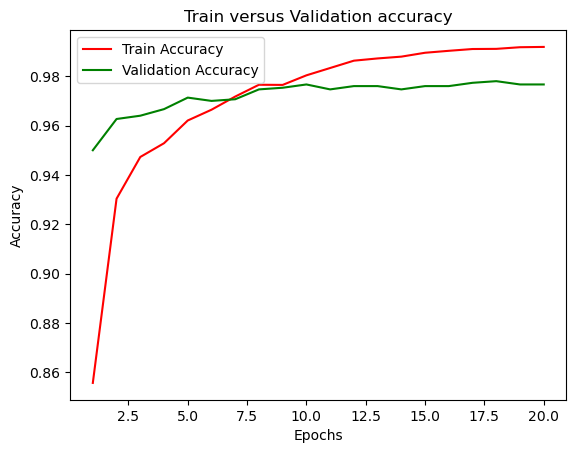

In [27]:
# hint: use simple_process
train_accuracy = simple_process.history['accuracy']
val_accuracy = simple_process.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'r', label='Train Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title('Train versus Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 5. Convolutional Neural Network

We will now complete the tasks above using a more complicated model: Convolutional Neural Network.

Your task is the following:
1. Adapt the CNN tensorflow tutorial here (https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/) to train a Convolutional Neural Network model
2. You are required to use <b>ONLY</b> the $X_{train}, Y_{train}, X_{val}, Y_{val}, X_{test}, Y_{test}$ subsets provided earlier in this assignment. <b>DO NOT use any other subsets of the mnist dataset: you will have to adapt the tutorial to use the data provided in this assignment.</b>
3. Use the same one-hot encoder as the previous part
4. Note that you will not need to use any validation in this part. Train using $X_{train}, Y_{train}$.
5. Finally, produce the following:
	Time taken to train the model; Time taken to produce Test set predictions; Test set accuracy

<b>Note:</b> We recommend following the code skeleton below.

In [33]:
# Test CNN and report accuracy, time

from keras.utils import to_categorical
from keras import layers
from keras.optimizers import SGD

def conv_nn(X, Y, X_val, Y_val, X_test, Y_test):
    # your code below
    # (1 pt) reshape dataset to have a single channel (see tutorial)
    X = X.reshape((X.shape[0], 28, 28, 1))
    X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
    X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
    
    # (1 pt) one-hot encode the labels
    Y_encode = to_categorical(Y)
    Y_val_encode = to_categorical(Y_val)  
    Y_test_encode = to_categorical(Y_test)

    # Implement CNN
    
         # (8 pts) your model here
    model = tf.keras.models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
        layers.Dense(10, activation='softmax')
    ])
    
    # (2 pts) compile model
    optimal = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer= optimal, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

   # Train CNN and report time
    
    # (4 pts) train model for 20 epochs and time it
    # make sure to achieve 100% training accuracy
    start_train = time.time()
    process = model.fit(X, Y_encode, epochs=20, batch_size=64, validation_data=(X_val, Y_val_encode))
    end_train = time.time()

    
    # Test CNN and report accuracy, time
    
    # (4 pts) evaluate model and time it
    start_test = time.time()
    loss, test_accuracy = model.evaluate(X_test, Y_test_encode)
    end_test = time.time()

    
    train_runtime= end_train - start_train
    train_accuracy = process.history['accuracy'][-1]
    test_runtime = end_test - start_test
    return process, train_accuracy, test_accuracy, train_runtime, test_runtime
    

conv_process, train_accuracy, test_accuracy, train_runtime, test_runtime = conv_nn(X_train, Y_train, X_val, Y_val, X_test, Y_test)
print("Train time: {:.4f} seconds".format(train_runtime))
print("Train accuracy: {:.4f}".format(train_accuracy))

print("\nTest Time: {:.4f} seconds".format(test_runtime))
print("Test accuracy: {:.4f}".format(test_accuracy))


Epoch 1/20
258/258 [==============================] - 3s 10ms/step - loss: 0.3945 - accuracy: 0.8805 - val_loss: 0.1517 - val_accuracy: 0.9607
Epoch 2/20
258/258 [==============================] - 2s 9ms/step - loss: 0.1718 - accuracy: 0.9505 - val_loss: 0.0936 - val_accuracy: 0.9760
Epoch 3/20
258/258 [==============================] - 2s 9ms/step - loss: 0.1144 - accuracy: 0.9672 - val_loss: 0.0775 - val_accuracy: 0.9807
Epoch 4/20
258/258 [==============================] - 2s 9ms/step - loss: 0.0852 - accuracy: 0.9766 - val_loss: 0.0653 - val_accuracy: 0.9793
Epoch 5/20
258/258 [==============================] - 2s 9ms/step - loss: 0.0643 - accuracy: 0.9815 - val_loss: 0.0632 - val_accuracy: 0.9840
Epoch 6/20
258/258 [==============================] - 2s 9ms/step - loss: 0.0496 - accuracy: 0.9866 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 7/20
258/258 [==============================] - 2s 9ms/step - loss: 0.0368 - accuracy: 0.9904 - val_loss: 0.0632 - val_accuracy: 0.9767
Epoch

(2 pts) Plot the training and validation accuracy curves in the same plot.

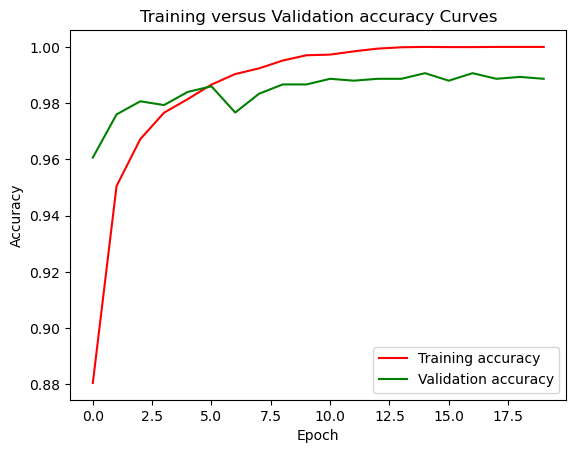

In [34]:
# hint: use conv_process
training_accuracy = conv_process.history['accuracy']
validation_accuracy = conv_process.history['val_accuracy']

plt.plot(training_accuracy, 'r',label='Training accuracy')
plt.plot(validation_accuracy,'g', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training versus Validation accuracy Curves')
plt.legend()

plt.show()

(3 pts) What do you observe in the plots showing training v.s. validation accuracies? Why?

Both Training and validation accuracies generally increase with upwards trends. The training accuracies have a steeper increase after the first few epochs until they ultimately converge to some accuracy (99% for the simple NN and 100% for convolutional NN).
And the Green validation curves confirms how well the NN fits under validation data. The model has already learned from the training data, so the validation process starts off its classificsation at a higher value with slight increases in accuracy througout the epochs

Neural networks here can fit well the classificaiton becuase of the learning done with training data can allow the model to generalize well to unseen observations.


(6 pts) Comment on the features of the various algorithms you have used in this assignment and the tradeoffs between computational efficiency and accuracy.

K nearest neighbors handles mutli-classification problem very accurately, but it's computationally intensive and could suffer from the curse of dimensionality with broader feature spaces and larger data sets. It's unique feature of using distance and norm metrics make it so.
And the tradeoff here is the accuracy from larger choices of k neighbors and p norms, at the cost of longer and longer runtimes.

Neural Networks accurately classify with the help of features like dropout regulatization, which handles overfitting by deactivating training neurons, so more generazable patterns from features can better help achieve non-linear classification.
And the tradeoff here is requiring a comprehensive amount of data for training in order to achieve better results at validation. 

Convolutional neural networks are capable of handling image data by taking advantage of the convolution layers that give a clearer weighting to each pixel with repect to its neighbors. So in that way it can find better spatial relationships to the data. Stochastic gradient descent is also the adept optimizer feature we can use to fit better with the training. 
And the tradeoff here is a more a complex design that requires more parameter tuning with batch sizes for a more optimal classification analysis that fits well to the data.

Logistic regression assigns probabilites of class membership as a transformation of the features, and it has a sort of implicit regularization.
So it may or may not adeptly classifly non-simple classification problems?
And the tradeoff here is a simpler design with a flexible fit to future unseen data, but may not yield highly predictive models like Neural Networks could.

Polynomial regression allows the introduction of polynomial features for non-linear decision boundaries.
And the tradoff is more flexible fit in various data patterns at the cost of relatively longer computation to handle the feature space, and not as accurate for sizing to more complex classification patterns.